In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 6. 시계열 모델링 기본 개념

###  *시계열 모델링의 개념 소개*

+ 자기상관성 (Autocorrelation): 자기상관성은 시계열 데이터 내에서 관측 값들 사이의 상관관계를 의 미합니다. 특정 시간 지연(lag)에 대한 관측 값들 간의 상관관계를 측정하여 시계열 데이터의 패턴과 예측에 유용한 정보를 제공합니다. 자기상관성은 데이터가 시간에 따라 얼마나 유지되는지, 어떤 주 기성을 가지는지 등을 파악하는 데 도움을 줍니다.
<br></br>
+ 정상성 (Stationarity): 정상성은 시계열 데이터의 통계적 특성이 시간에 따라 일정하게 유지되는 것을 의미합니다. 정상성을 가정하면 데이터의 평균, 분산 및 자기상관성이 시간에 따라 변하지 않습니다. 정상성을 만족하는 시계열 데이터는 예측이나 분석에 있어서 더욱 신뢰할 수 있습니다. 정상성을 가지 지 않는 데이터의 경우 트렌드, 계절성 또는 비정상성 요소가 존재할 수 있으며, 이를 제거하거나 변환 하여 정상성을 가진 데이터로 변환하는 작업이 필요합니다.


### *<h3 style="color: green;">이동평균 모델(MA)</h3>*

이동평균 모델 (Moving Average Model, MA)은 시계열 데이터의 예측을 위해 사용되는 모델 중 하나입니다. MA 모델은 시계열 데이터의 현재 관측치를 이전 관측치들의 오차항(잔차)의 가중 평균으로 설명합니다.

#### 주요 개념

+ 이동평균: MA 모델에서 "이동평균"은 이전 관측치들의 오차항의 가중 평균을 의미합니다. 이동평균은 현재 시점에서의 예측값을 계산하는 데 사용됩니다.
<br></br>
+  오차항: MA 모델에서는 시계열 데이터의 예측 오차를 이전 관측치들의 오차항으로 설명합니다. 이전 관측치 들의 오차항은 시계열 데이터의 불규칙한 패턴이나 예측할 수 없는 변동성을 나타내는 요소로 간주됩니다.
<br></br>
+ 이동평균 차수: MA 모델은 "MA(q)"라고 표현되며, 여기서 "q"는 이동평균 차수를 나타냅니다. 이동평균 차 수는 몇 개의 이전 관측치들의 오차항을 사용하여 현재 시점의 예측값을 계산할지를 결정합니다.
<br></br>
+ 자기상관성: MA 모델은 자기상관성이 없는 (무상관) 시계열 데이터를 가정합니다. 즉, 이전 관측치들의 오 차항들은 서로 상관되지 않는다고 가정합니다.

In [35]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [36]:
from statsmodels.tsa.arima.model import ARIMA

In [37]:
#이동평균 모델 실습
n = 100
ma_params = [0.4, -0.2]  #이동평균 계수
residuals = np.random.normal(0, 1, n)  # 잔차 생성

#MA(2) 모델 생성
data = [0, 0]
for i in range(2, n) :
    data.append(ma_params[0] * residuals[i - 1] + ma_params[1] + residuals[i-2] + residuals[i])

df = pd.DataFrame({
    'Value' : data
})

print(df)

       Value
0   0.000000
1   0.000000
2  -0.126438
3  -1.086556
4  -2.255850
..       ...
95 -1.330329
96  1.026449
97  0.760674
98  3.064428
99  2.825326

[100 rows x 1 columns]


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  100
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -150.552
Date:                Fri, 09 Jun 2023   AIC                            309.104
Time:                        23:54:05   BIC                            319.525
Sample:                             0   HQIC                           313.322
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0330      0.260     -0.127      0.899      -0.542       0.476
ma.L1          0.3613      4.077      0.089      0.929      -7.630       8.353
ma.L2          0.9999     22.601      0.044      0.9

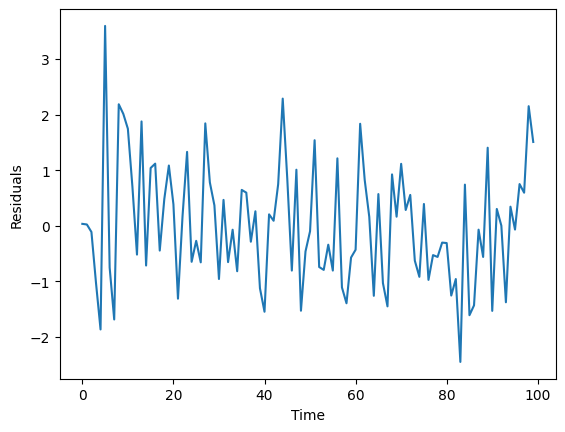

In [38]:
model = ARIMA(df['Value'], order=(0,0,2))
results = model.fit()

print(results.summary())

# 잔차 시계열 그래프 출력
plt.plot(results.resid)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

### *<h3 style="color: green;">자기회귀 모델(AR)</h3>*

In [39]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf

In [40]:
#자기회귀 모델 실습
n = 100  # 데이터 포인트 수
ar_params = [0.7]  # 자기 회귀 계수
ma_params = []  # 이동평균 계수
residuals = np.random.normal(0, 1, n)  # 잔차 생성

# AR(1) 모델 생성
data = [0]  # 초기값 설정
for i in range(1, n):
    data.append(ar_params[0] * data[i-1] + residuals[i])

# 데이터 프레임 생성
df = pd.DataFrame({
    'Date': pd.date_range(start="2023-01-01", periods=n, freq='D'),
    'Value': data
})

print(df)

         Date     Value
0  2023-01-01  0.000000
1  2023-01-02 -0.239379
2  2023-01-03  0.932094
3  2023-01-04  1.307730
4  2023-01-05  1.555542
..        ...       ...
95 2023-04-06  1.374943
96 2023-04-07  1.060185
97 2023-04-08  1.325083
98 2023-04-09  0.528109
99 2023-04-10  0.739732

[100 rows x 2 columns]


                            AutoReg Model Results                             
Dep. Variable:                  Value   No. Observations:                  100
Model:                     AutoReg(1)   Log Likelihood                -135.055
Method:               Conditional MLE   S.D. of innovations              0.947
Date:                Fri, 09 Jun 2023   AIC                            276.110
Time:                        23:54:06   BIC                            283.895
Sample:                             1   HQIC                           279.260
                                  100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0807      0.097     -0.835      0.404      -0.270       0.109
Value.L1       0.5838      0.082      7.119      0.000       0.423       0.744
                                    Roots           

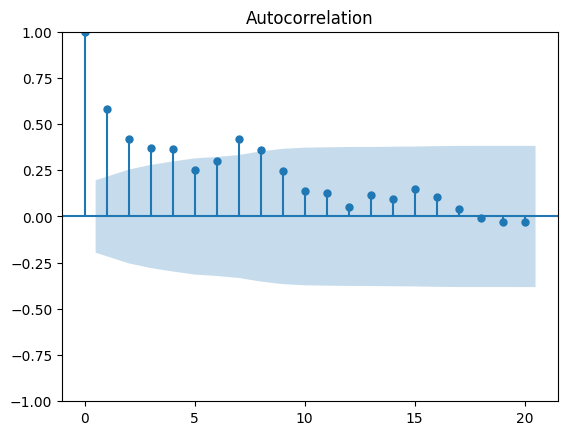

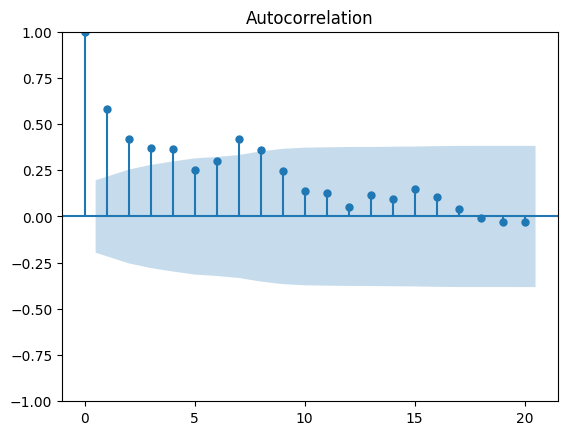

In [41]:
#AR(1) 모델 적합
model = AutoReg(df['Value'], lags=1)
results = model.fit()

#모델 정보 출력
print(results.summary())

#ACF 그래프 출력
plot_acf(df['Value'], lags=20)

### *<h3 style="color: green;">ARMA 모델</h3>*

AR + MR => ARMA모델

자기회귀(AR) 모델과 이동평균(MA) 모델의 결합입니다. ARMA 모델은 시계열 데이터의 자기상관성과 이동 평균성을 모두 고려하여 데이터를 설명하는 모델입니다.

+ AR 모델은 이전 시점의 값에 의존하여 현재 시점의 값을 예측하므로 시계열 데이터의 추세를 설명 가능
<br></br>
+ MA 모델은 이전 오차항에 의존하여 현재 시점의 값을 예측하므로 시계열 데이터의 잡음을 설명 가능
<br></br>
+ ARMA 모델은 자기상관성과 이동평균성을 동시에 고려하므로 다양한 시계열 데이터 패턴을 모델링할 수 있습니다.
<br></br>
+ ARMA 모델은 백색 잡음 가정을 만족하는 데이터에 적합합니다.

ARMA 모델은 주어진 시계열 데이터의 패턴을 파악하고 예측하는 데 유용합니다. ARMA 모델의 파라미터는 주 로 최소자승법, 최대 가능도 추정 등의 통계적 방법을 사용하여 추정됩니다.

### *<h3 style="color: green;">ARIMA 모델</h3>*

AR + MR + 차분 => ARMA + 차분

AR 모델, MA 모델, 그리고 차분(Difference) 개념을 결합한 시계열 모델입니다. ARIMA 모델은 시계열 데이 터의 자기상관성, 이동평균성, 그리고 추세 변동을 모두 고려하여 데이터를 설명하고 예측하는 데 사용

+ ARIMA 모델은 자기회귀와 이동평균 모델을 결합하면서도 추세 변동을 반영할 수 있습니다.
<br></br>
+ 차분(Difference) 개념을 포함하여 데이터의 비정상성을 제거하고 정상성을 가진 데이터로 변환
<br></br>
+ ARIMA 모델은 정상성을 가진 데이터에 적합합니다. 따라서 데이터에 정상성이 없을 경우 차분 과정을 통해 정상성을 확보한 후 모델을 적용합니다.
<br></br>
+ ARIMA(p, d, q) 모델에서 p는 AR 모델의 차수, d는 차분(Difference)의 차수, q는 MA 모델의 차수를 의미 ARIMA 모델은 주어진 시계열 데이터의 추세와 계절성을 모델링하고 예측하는 데 유용합니다. ARIMA 모델의 파라미터는 최소자승법, 최대 가능도 추정 등의 통계적 방법을 사용하여 추정됩니다.

또한, ARIMA 모델은 ACF(Autocorrelation Function)와 PACF(Partial Autocorrelation Function)를 통해 최적의 차수를 결정할 수 있습니다.

       Value
0   0.000000
1  -0.239379
2   0.932094
3   1.307730
4   1.555542
..       ...
95  1.374943
96  1.060185
97  1.325083
98  0.528109
99  0.739732

[100 rows x 1 columns]
                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  100
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -132.891
Date:                Fri, 09 Jun 2023   AIC                            275.782
Time:                        23:54:07   BIC                            288.808
Sample:                             0   HQIC                           281.054
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0516      0.4

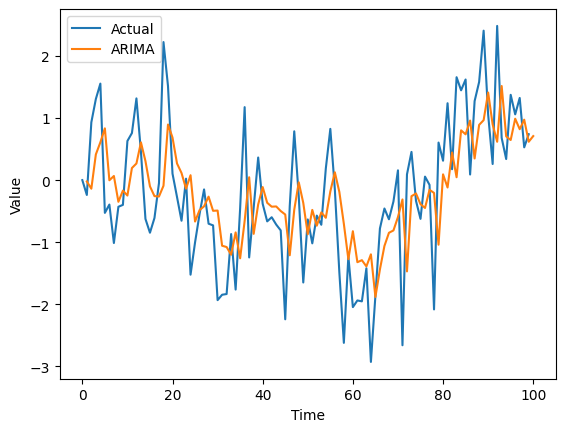

In [42]:
#ARIMA 모델링 실습
df = pd.DataFrame({ 'Value' : data})
print(df)

#ARIMA 모델 적합
model = ARIMA(df['Value'], order=(1, 0, 2))
results = model.fit()

#ARIMA 모델 정보 출력
print(results.summary())

#예측 결과 그래프 출력
pred = results.predict(start=1, end=n)
plt.plot(df['Value'], label='Actual')
plt.plot(pred, label='ARIMA')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

### *<h3 style="color: green;">계절성 모델</h3>*

시계열 데이터에서 계절성 패턴을 고려하는 ARIMA 모델의 확장입니다. 일반적인 ARIMA 모델은 자기회귀 (AR), 차분(Difference), 이동평균(MA) 성분으로 구성되어 시계열의 비정상성을 보정합니다. 하지만 계절성 이 있는 데이터에서는 추가적으로 계절성 성분을 고려해야 합니다.

계절성에 대한 자기회귀(Seasonal AR), 계절성 차분(Seasonal Difference), 계절성 이동평균(Seasonal MA) 성분을 추가적으로 모델에 포함시킵니다. 이를 통해 계절성 패턴을 더 정확하게 모델링할 수 있습니다.

Seasonal ARIMA 모델은 (p, d, q)와 (P, D, Q, S) 두 개의 매개변수를 가집니다. (p, d, q)는 비계절성 성분 에 대한 ARIMA 모델의 매개변수이고, (P, D, Q, S)는 계절성 성분에 대한 ARIMA 모델의 매개변수입니다. S는 계절성 주기를 나타냅니다.
계절성을 고려해야 하는 시계열 데이터의 경우, Seasonal ARIMA 모델을 적합하여 계절성 패턴을 포착하고 예측할 수 있습니다.

In [56]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [57]:
#계절성 모델 실습
#시계열 데이터 생성
np.random.seed(0)
n = 100
data = np.random.normal(0, 1, n)
dates = pd.date_range(start='2023-01-01', periods=n, freq='M')

#데이터프레임 생성
df = pd.DataFrame({'Value' : data}, index=dates)
print(df)

               Value
2023-01-31  1.764052
2023-02-28  0.400157
2023-03-31  0.978738
2023-04-30  2.240893
2023-05-31  1.867558
...              ...
2030-12-31  0.706573
2031-01-31  0.010500
2031-02-28  1.785870
2031-03-31  0.126912
2031-04-30  0.401989

[100 rows x 1 columns]


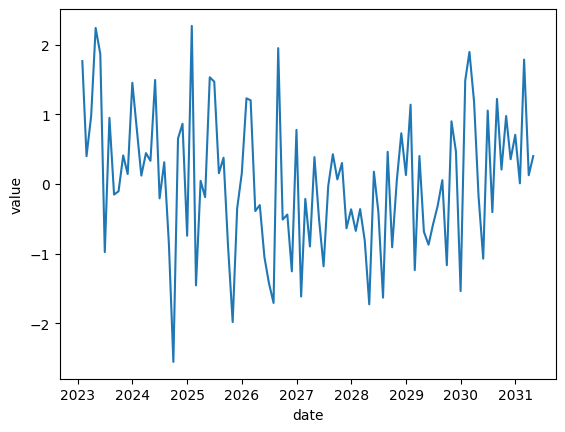

In [58]:
#데이터 시각화
plt.plot(df)
plt.xlabel('date')
plt.ylabel('value')
plt.show()

### *모델 선택과 평가 - AIC*

In [43]:
#시계열 데이터 생성
np.random.seed(0)
n = 100  #데이터 포인트 수
data = np.random.normal(0, 1, n)
print(data)

#ARIMA 모델 선택을 위한 AIC계산
best_aic = np.inf  #무한대를 나타내는 값
best_order = None

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877
  0.15494743  0.37816252 -0.88778575 -1.98079647 -0.34791215  0.15634897
  1.23029068  1.20237985 -0.38732682 -0.30230275 -1.04855297 -1.42001794
 -1.70627019  1.9507754  -0.50965218 -0.4380743  -1.25279536  0.77749036
 -1.61389785 -0.21274028 -0.89546656  0.3869025  -0.51080514 -1.18063218
 -0.02818223  0.42833187  0.06651722  0.3024719  -0.63432209 -0.36274117
 -0.67246045 -0.35955316 -0.81314628 -1.7262826   0.17742614 -0.40178094
 -1.63019835  0.46278226 -0.90729836  0.0519454   0.72909056  0.12898291
  1.13940068 -1.23482582  0.40234164 -0.68481009 -0.87079715 -0.57884966
 -0.31155253  0.05616534 -1.16514984  0.90082649  0

In [44]:
#모델의 차수 탐색
for p in range(3) :
    for d in range(2) :
        for q in range(3) : 
            order = (p, d, q)
            try :
                model = ARIMA(data, order=order)
                results = model.fit()
                aic = results.aic
                if aic < best_aic :
                    best_aic = aic
                    best_order = order
            except:
                continue

#최적 모델 출력
print("Best AIC:", best_aic)
print("Best Order:", best_order)

Best AIC: 286.1056145205982
Best Order: (0, 1, 1)


/Users/sang-yun/anaconda3/envs/AI/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### *모델 선택과 평가 - BIC*

In [45]:
#시계열 데이터 생성
np.random.seed(0)
n = 100  #데이터 포인트 수
data = np.random.normal(0, 1, n)

#최적의 BIC, order 초기화
best_bic = np.inf
best_order = None

In [46]:
#모델의 차수 탐색
for p in range(3) :
    for d in range(2) :
        for q in range(3) : 
            order = (p, d, q)
            try :
                model = ARIMA(data, order=order)
                results = model.fit()
                bic = results.bic
                if bic < best_bic :
                    best_bic = bic
                    best_order = order
            except:
                continue

#최적 모델 출력
print("Best BIC:", best_bic)
print("Best Order:", best_order)

Best BIC: 291.29585422086734
Best Order: (0, 1, 1)


/Users/sang-yun/anaconda3/envs/AI/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### *모델 선택과 평가*

In [47]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
...                ...
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432

[144 rows x 1 columns]


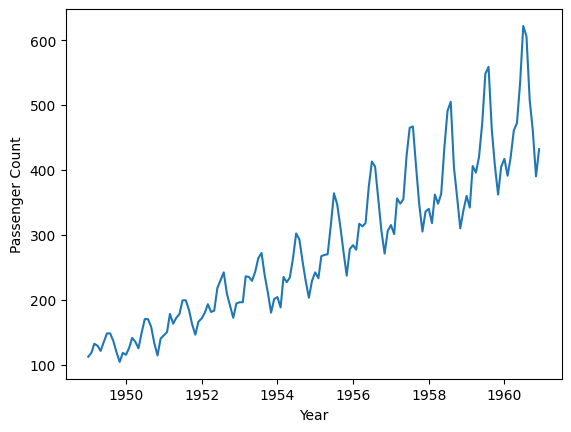

In [48]:
#AirPassengers 데이터 로드
data = pd.read_csv('./data/airline-passengers.csv')
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

print(data)

#데이터 시각화
plt.plot(data)
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.show()

#### ACF, PACF 그래프

+ ACF : ACF(Autocorrelation Function) 그래프는 시계열 데이터의 자기상관 관계를 보여주는 그래프입니다.
<br></br>
+ PACF : PACF(Partial Autocorrelation Function) 그래프는 시계열 데이터의 부분 자기상관 관계를 보여주는 그래프입니 다. 부분 자기상관 계수는 현재 관측값과 이전 관측값 간의상관관계에서다른관측값의영향을제거한후 의 상관 관계를 나타냅니다.

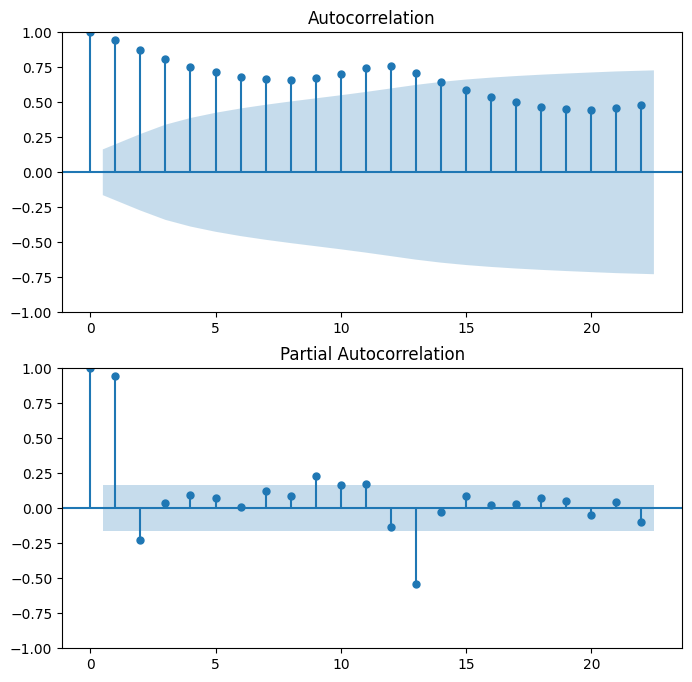

In [49]:
#자기상관 함수(ACF) 및 부분 자기상관 함수(PACF) 그래프
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,8))
plot_acf(data, ax=ax1)
plot_pacf(data, ax=ax2)
plt.show()

#### ADF 감정

ADF 감정(ADF test)은 시계열 데이터의 정상성을 검정진행

In [50]:
result = adfuller(data['Passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')

ADF Statistic: 0.8153688792060371
p-value: 0.9918802434376408
Critical Values:
1%: -3.4816817173418295
5%: -2.8840418343195267
10%: -2.578770059171598


In [53]:
#ARIMA 모델 적합
model = ARIMA(data, order=(2, 1, 2))
results = model.fit()

#모델 정보 출력
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Fri, 09 Jun 2023   AIC                           1353.347
Time:                        23:55:55   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.060      0.000       1.645       1.725
ar.L2         -0.9548      0.017    -55.420      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.812      0.0

/Users/sang-yun/anaconda3/envs/AI/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/sang-yun/anaconda3/envs/AI/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/sang-yun/anaconda3/envs/AI/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/sang-yun/anaconda3/envs/AI/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1950-01-01    121.156928
1950-02-01    120.594788
1950-03-01    132.840012
1950-04-01    146.351308
1950-05-01    137.425714
                 ...    
1961-08-01    539.728844
1961-09-01    508.527884
1961-10-01    478.147288
1961-11-01    456.747584
1961-12-01    449.697514
Freq: MS, Name: predicted_mean, Length: 144, dtype: float64


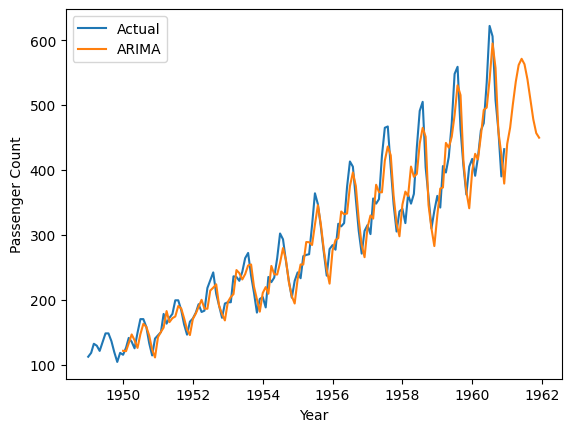

In [54]:
#예측 결과 그래프
pred = results.predict(start='1950-01-01', end='1961-12-01')
print(pred)
plt.plot(data, label='Actual')
plt.plot(pred, label='ARIMA')
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.legend()
plt.show()